In [1]:
import os
import json
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from src.data_loader import Shifted_Data_Loader
from src.plot import orig_vs_transformed as plot_ovt
from src.plot import enc_dec_samples
from src.models import GResNet,EDense
from src.config import get_config
from src.trainer import Trainer
from src.utils import prepare_dirs_and_logger
from keras.datasets import fashion_mnist,mnist
from keras.layers import Dense
# from tabulate import tabulate

Using TensorFlow backend.


In [2]:
config,_ = get_config()
setattr(config, 'batch_size', 512)
setattr(config, 'dataset', 'fashion_mnist')
setattr(config, 'epochs', 100)
setattr(config, 'enc_layers', [3000,2000])
setattr(config, 'dec_blocks', [4,2,1])
setattr(config, 'z_dim', 5)
setattr(config, 'xcov', 10)
setattr(config, 'recon', 15)
setattr(config, 'log_dir', '../logs')
setattr(config, 'dev_mode',False)
setattr(config, 'monitor', 'val_G_loss')
setattr(config, 'min_delta', 0.5)
# setattr(config, 'xcov', None)

vars(config)

{'batch_size': 512,
 'data_dir': 'data',
 'dataset': 'fashion_mnist',
 'dec_blocks': [4, 2, 1],
 'dev_mode': False,
 'enc_layers': [3000, 2000],
 'epochs': 100,
 'log_dir': '../logs',
 'log_level': 'INFO',
 'min_delta': 0.5,
 'monitor': 'val_G_loss',
 'optimizer': 'adam',
 'recon': 15,
 'xcov': 10,
 'xent': 10,
 'y_dim': 10,
 'z_dim': 5}

In [3]:
if not config.dev_mode:
    print('setting up...')
    prepare_dirs_and_logger(config)
    
    with open(os.path.join(config.model_dir,'params.json'), 'w') as fp:
        json.dump(vars(config), fp)

setting up...


In [4]:
DL = Shifted_Data_Loader(dataset=config.dataset,flatten=True,
                         rotation=0.25,
                         translation=0.9,
                        )

input_shape:  (3136,)
dataset:  fashion_mnist
scale:  2
tx_max:  0.9
rot_max:  0.25
loading fashion_mnist...
sx_train:  (60000, 3136)
making training data...
making testing data...


In [5]:
G_builder = GResNet(y_dim=config.y_dim,z_dim=config.z_dim,dec_blocks=config.dec_blocks)
E_builder = EDense(enc_layers=config.enc_layers,z_dim=config.z_dim,)
trainer = Trainer(config,DL,E_builder,G_builder,)

building encoder...
building decoder/generator...


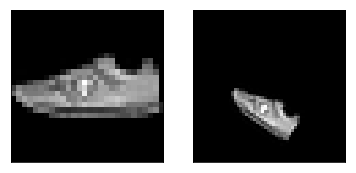

In [6]:
pt,idx = plot_ovt(DL,cmap='gray')

In [7]:
# trainer.build_model()
trainer.compile_model()

In [8]:
from keras.utils import to_categorical
RF = to_categorical(np.ones(len(DL.sx_train)),num_classes=2)

In [9]:
trainer.go(x=DL.sx_train,
           y={'class':DL.y_train_oh,'D':RF,'G':DL.sx_train},
           validation_split=0.05,
           verbose=0)

Epoch:  0
{'val_G_mse': 66.355782816569, 'G_mse': 116.68645242577269, 'val_class_acc': 0.1196666665673256, 'val_D_loss': 1.8160428832372029, 'val_loss': 1022.1117265625, 'class_acc': 0.1188421052610665, 'G_loss': 116.68645242577269, 'val_class_loss': 2.6229271996816, 'loss': 1790.2682520644873, 'val_G_loss': 66.355782816569, 'D_loss': 1.875353037650125, 'class_loss': 2.8936502907401636}
Epoch:  1
{'val_G_mse': 49.99505776977539, 'G_mse': 41.35024929434793, 'val_class_acc': 0.13133333269755046, 'val_D_loss': 1.9100064706802369, 'val_loss': 774.8941793619791, 'class_acc': 0.12180701754385966, 'G_loss': 41.35024929434793, 'val_class_loss': 2.4255637238820396, 'loss': 646.5760206705729, 'val_G_loss': 49.99505776977539, 'D_loss': 1.864907084096942, 'class_loss': 2.5900613505380194}
Epoch:  2
{'val_G_mse': 35.453260355631514, 'G_mse': 33.802040298194214, 'val_class_acc': 0.17466666686534882, 'val_D_loss': 1.7783913199106853, 'val_loss': 554.5320652669271, 'class_acc': 0.14738596492692044, 'G

In [10]:
DL = Shifted_Data_Loader(dataset=config.dataset,flatten=True,
                         rotation=0.25,
                         translation=0.9,
                        )

input_shape:  (3136,)
dataset:  fashion_mnist
scale:  2
tx_max:  0.9
rot_max:  0.25
loading fashion_mnist...
sx_train:  (60000, 3136)
making training data...
making testing data...


In [11]:
from keras.optimizers import adam

In [12]:
trainer.model.optimizer = adam()
trainer.go(x=DL.sx_train,
           y={'class':DL.y_train_oh,'D':RF,'G':DL.sx_train},
           validation_split=0.05,
           verbose=0)

Epoch:  0
{'val_G_mse': 18.386265955607097, 'G_mse': 17.40231647103293, 'val_class_acc': 0.48866666412353515, 'val_D_loss': 1.5026878747940065, 'val_loss': 289.4638313802083, 'class_acc': 0.49784210534681356, 'G_loss': 17.40231647103293, 'val_class_loss': 1.3125052715937298, 'loss': 274.69407042814555, 'val_G_loss': 18.386265955607097, 'D_loss': 1.4118847432722126, 'class_loss': 1.3173703088425754}
Epoch:  1
{'val_G_mse': 17.17048409016927, 'G_mse': 16.981666650604783, 'val_class_acc': 0.48566666603088376, 'val_D_loss': 1.4463650890986124, 'val_loss': 271.02245548502606, 'class_acc': 0.5035087718545345, 'G_loss': 16.981666650604783, 'val_class_loss': 1.3047707557678223, 'loss': 268.2451901684142, 'val_G_loss': 17.17048409016927, 'D_loss': 1.4541117071185197, 'class_loss': 1.3017843305353534}
Epoch:  2
{'val_G_mse': 17.519603729248047, 'G_mse': 16.713559770015248, 'val_class_acc': 0.5009999974568685, 'val_D_loss': 1.4648241602579752, 'val_loss': 276.0561429036458, 'class_acc': 0.5097719

In [13]:
# trainer.go_gen(DL.train_generator(batch_size=128),verbose=1)

In [15]:
hist_df = pd.DataFrame.from_records(trainer.model.history.history)
hist_df.head()

,D_loss,G_loss,G_mse,class_acc,class_loss,loss,val_D_loss,val_G_loss,val_G_mse,val_class_acc,val_class_loss,val_loss
0,1.411885,17.402316,17.402316,0.497842,1.317370,274.694070,1.502688,18.386266,18.386266,0.488667,1.312505,289.463831
1,1.454112,16.981667,16.981667,0.503509,1.301784,268.245190,1.446365,17.170484,17.170484,0.485667,1.304771,271.022455
2,1.444866,16.713560,16.713560,0.509772,1.286671,264.033471,1.464824,17.519604,17.519604,0.501000,1.283055,276.056143
3,1.439391,16.667576,16.667576,0.514842,1.275817,263.229150,1.508756,17.423823,17.423823,0.505667,1.269894,274.489257
4,1.444829,16.453809,16.453809,0.520193,1.264714,259.914831,1.434736,17.448471,17.448471,0.511667,1.259828,274.739965


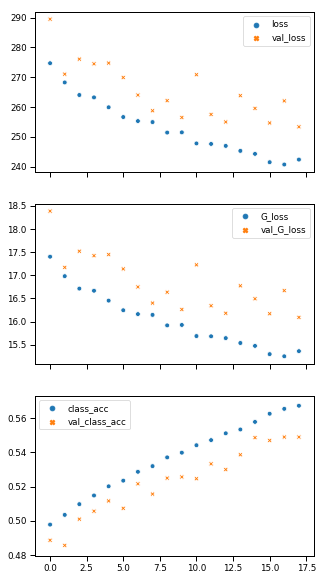

In [17]:
sns.set_context('paper')
metrics = ['loss','G_loss','class_acc']
fig,axs = plt.subplots(nrows=len(metrics),sharex=True,figsize=(5,10))
for metric_name,ax in zip(metrics,axs):
    sns.scatterplot(data=hist_df[[metric_name,'val_'+metric_name]],ax=ax)

In [18]:
if not config.dev_mode:
    trainer.save_model()

In [19]:
from keras.models import Model
from keras.layers import Input

In [20]:
generator = trainer.G

In [21]:
z_encoder = Model(trainer.E.input,trainer.z_lat)
classifier = Model(trainer.E.input,trainer.y_lat)
# decoder_inp = Input(shape=(config.y_dim+config.z_dim,))
# dec_layers = trainer.model.layers[-(1+(5*2)):]
# print(dec_layers)
# _gen_x = dec_layers[0](decoder_inp)
# l = dec_layers[1]
# isinstance(l,keras.layers.core.Reshape)
# F = None
# for l in dec_layers[1:]:
#     print(type(l))
    
#     if isinstance(l,keras.layers.merge.Add):
#         _gen_x = l([F,_gen_x])
#     else:
#         _gen_x = l(_gen_x)
    
#     if isinstance(l,keras.layers.convolutional.Conv2DTranspose):
#         if l.kernel_size==(1,1):
#             F = _gen_x
            
# # generator = Model(decoder_inp,_gen_x)

In [22]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3000)              9411000   
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              6002000   
_________________________________________________________________
y_lat (Dense)                (None, 10)                20010     
Total params: 15,433,010
Trainable params: 15,433,010
Non-trainable params: 0
_________________________________________________________________


In [23]:
DL.y_test_oh.shape

(10000, 10)

In [24]:
classifier.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
classifier.evaluate(DL.sx_test,DL.y_test_oh,batch_size=config.batch_size)

10000/10000 [==============================] - 0s 35us/step


[10.176484982299804, 0.12890000016689301]

In [25]:
z_enc = z_encoder.predict(DL.sx_test,batch_size=config.batch_size)
y_class = classifier.predict(DL.sx_test,batch_size=config.batch_size)

In [26]:
_lat_vec = np.concatenate([y_class,z_enc],axis=1)
_lat_vec.shape

(10000, 15)

In [27]:
regen = generator.predict(_lat_vec,batch_size=config.batch_size)

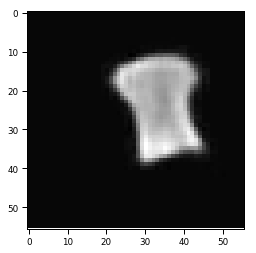

In [28]:
rand_im = np.random.randint(0,10000)
plt.imshow(regen[rand_im].reshape(56,56),cmap='gray')

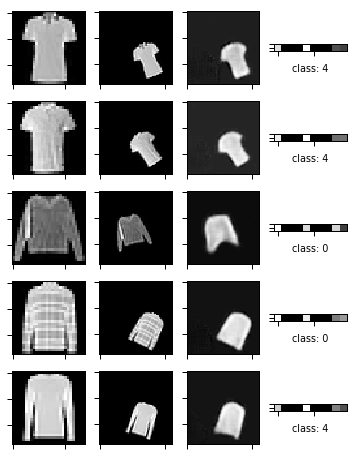

In [29]:
enc_dec_samples(DL.x_test,DL.sx_test,z_enc,y_class,generator)

In [30]:
from src.metrics import var_expl
dxs = DL.dx[1]-14
dys = DL.dy[1]-14
dtheta = DL.dtheta[1]
fve_dx = var_expl(features=z_enc,cond=dxs,bins=21)
fve_dy = var_expl(features=z_enc,cond=dys,bins=21)
fve_dt = var_expl(features=z_enc,cond=dtheta,bins=21)

In [31]:
fve_dx_norm = (dxs.var()-fve_dx)/dxs.var()
fve_dy_norm = (dys.var()-fve_dy)/dys.var()
fve_dth_norm = (dtheta.var()-fve_dt)/dtheta.var()

In [32]:
import seaborn as sns
sns.set_context('talk')

In [33]:
fve_dx_norm.shape

(21, 5)

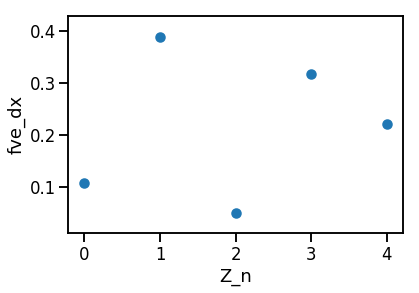

In [34]:
plt.scatter(np.arange(config.z_dim),fve_dx_norm.mean(axis=0))
plt.xlabel('Z_n')
plt.ylabel('fve_dx')
# plt.ylim(-0.125,0.25)
xdim = np.argmax(fve_dx_norm.mean(axis=0))

In [35]:
fve_dy_norm.mean(axis=0)

array([0.30409613, 0.30144226, 0.39409461, 0.14257666, 0.0614662 ])

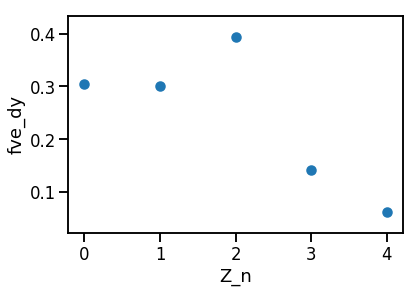

In [36]:
plt.scatter(np.arange(config.z_dim),fve_dy_norm.mean(axis=0))
plt.xlabel('Z_n')
plt.ylabel('fve_dy')
# plt.ylim(-0.125,0.25)
ydim = np.argmax(fve_dy_norm.mean(axis=0))

2

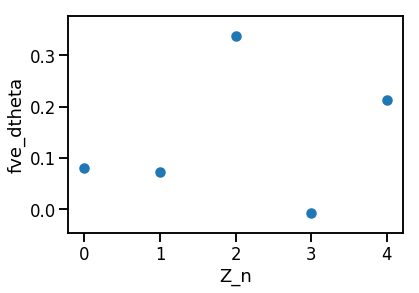

In [37]:
plt.scatter(np.arange(config.z_dim),fve_dth_norm.mean(axis=0))
plt.xlabel('Z_n')
plt.ylabel('fve_dtheta')
# plt.ylim(0.0,0.5)
np.argmax(fve_dth_norm.mean(axis=0))

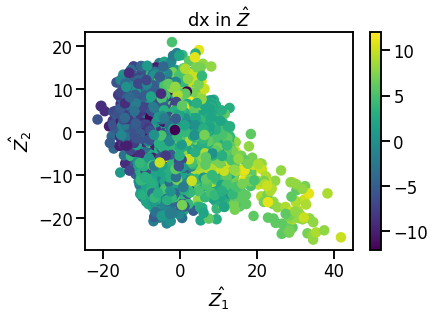

In [38]:
from src.plot import Z_color_scatter
Z_color_scatter(z_enc,[xdim,ydim],dxs)

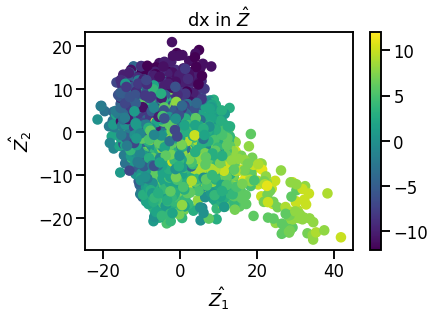

In [39]:
Z_color_scatter(z_enc,[xdim,ydim],dys)

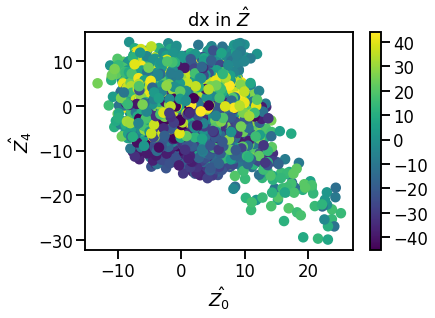

In [40]:
Z_color_scatter(z_enc,[0,4],dtheta)

In [41]:
from plt.

SyntaxError: invalid syntax (<ipython-input-41-2519179a1145>, line 1)